# <i> E-Commerce (Target) Sales Dataset Analysis</i> <H3> About Dataset </H3>
# <h4> The dataset used in this analysis is the **E-Commerce (Target) Sales Dataset**, which provides a comprehensive overview of Target's Brazilian operations and customer data. This dataset includes various tables that capture detailed information about sales transactions, customers, products, and more. Below is a summary of the key tables and their attributes:




**Install Modules & Library**

In [1]:
# Install pandas library for data manipulation and analysis
!pip install pandas 
# Install Matplotlib library for data manipulation and analysis
!pip install matplotlib 
!pip install -U kaleido
import plotly.graph_objects as go
import plotly.io as pio


   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/65.9 MB 399.6 kB/s eta 0:02:44
   ---------------------------------------- 0.5/65.9 MB 399.6 kB/s eta 0:02:44
   ---------------------------------------- 0.5/65.9 MB 399.6 kB/s eta 0:02:44
   ---------------------------------------- 0.5/65.9 MB 399.6 kB/s eta 0:02:44
   ---------------------------------------- 0.8/65.9 MB 381.3 kB/s eta 0:02:51
    --------------------------------------- 1.0/65.9 MB 488.8 kB/s eta 0:02:13
    --------------------------------------- 1.3/65.9 MB 545.6 kB/s eta 0:01:59
    -----------------------

In [3]:
# Install MySQL connector library for connecting to MySQL databases from Python
!pip install mysql-connector-python 
# Install pandas library for data manipulation and analysis
!pip install seaborn  


**Import Tables into the My SQL Database** 

In [6]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'delivery'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='Ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Asus/Downloads/archive (6)'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

**Connecting With Mysql Database**

In [5]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import mysql.connector
db= mysql.connector.connect(host="localhost",
                            user="root",
                            password="12345",
                            database="Ecommerce")
cur=db.cursor()

 ### **List all Unique Cities where Customers are Located**

In [87]:
query= """Select distinct  customer_city from customers """
cur.execute(query)
data=cur.fetchall()
print(f"Hence There are  {len(data)} Unique Cities ")
df=pd.DataFrame(data,columns=['Cities_Name'])
df.head()

Hence There are  4119 Unique Cities 


,Cities_Name
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


 ### **Count the No. of Orders Placed in 2017**

In [31]:
query = """ Select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data=cur.fetchall()
f" Total No. of orders Placed in 2017 : {data[0][0]} "

' Total No. of orders Placed in 2017 : 45101 '

 ### **Find the Total Sales per category**

In [47]:
query ="""select products.product_category as category ,upper(round(sum(payments.payment_value),2))as sales
from order_items join payments on payments.order_id = order_items.order_id
join products on order_items.product_id=products.product_id
group by 1 order by 2 desc """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Categories','Sales'])
df


,Categories,Sales
0,home appliances,95532.27
1,cine photo,9530.32
2,climatization,91170.66
3,automotive,852294.33
4,House comfort,84329.06
...,...,...
69,ELECTRICES 2,124563.46
70,cds music dvds,1199.43
71,Agro Industria e Comercio,118730.61
72,housewares,1094758.13


### **Calculate the percentage of orders that were paid in installments**

In [53]:
query='''select sum(case when payment_installments >= 1 then 1
else 0 end)
/count(order_id)*100 from payments'''
cur.execute(query)
data=cur.fetchall()

f'the percentage of orders that paid in installments is {data[0][0]}'

'the percentage of orders that paid in installments is 99.9981'

### **Count the Numbers of Customers from each State**

In [11]:
query ='''select customer_state as State , count(customer_unique_id) as Customer_id  
from customers group by 1
'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['State','Customer_count'])
df

,State,Customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


Text(0.5, 1.0, 'More Customer from SP State')

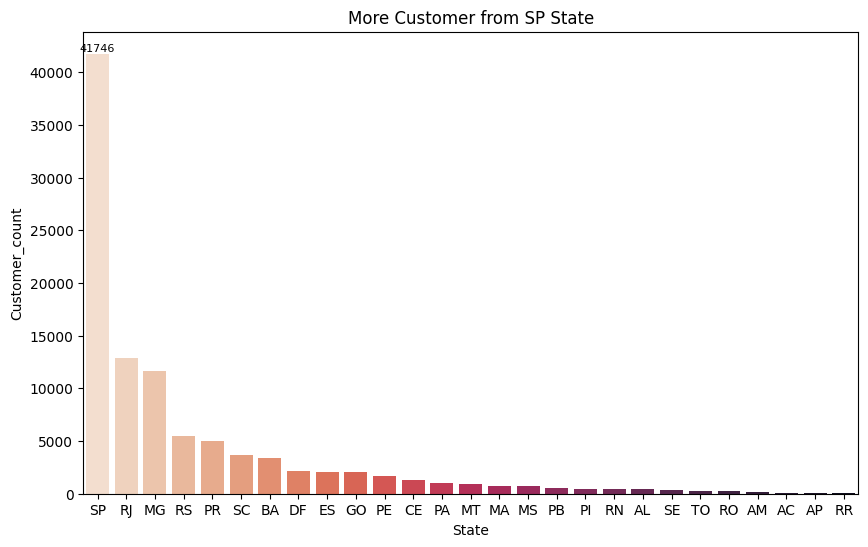

In [12]:
plt.figure(figsize=(10,6 ))
df=df.sort_values(by="Customer_count",ascending=False)
ax = sns.barplot(df, x="State", y="Customer_count", estimator="sum",palette='rocket_r',
                 hue='State',legend=False,
                 errorbar=None,color='orange')
ax.bar_label(ax.containers[0], fontsize=8);
plt.title("More Customer from SP State")

### Calculate the No. of ordered per Month

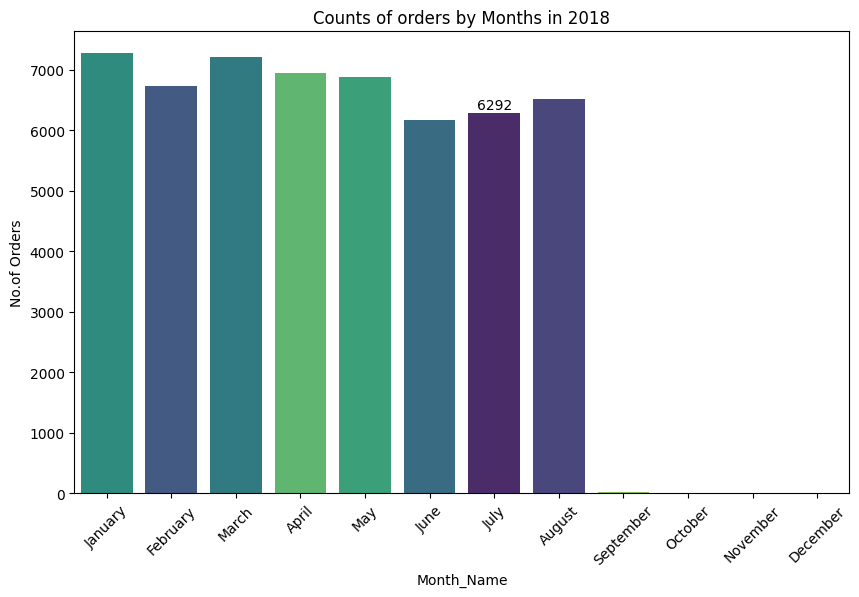

In [13]:
query= '''Select year(order_purchase_timestamp) as Year, 
monthname(order_purchase_timestamp) as Month_Name ,count(order_id) as No_of_Orders
from orders where year(order_purchase_timestamp)=2018
group by 1,2'''
cur.execute(query)
data=cur.fetchall()
# data
df=pd.DataFrame(data,columns=['Year','Month_Name','No.of Orders'])
df
plt.figure(figsize=(10,6))
Months_name=['January','February','March','April','May','June','July','August','September','October','November','December']
ax=sns.barplot(x='Month_Name',y='No.of Orders',data=df,order=Months_name,color='green',
              palette='viridis',hue='Month_Name',legend=False)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Counts of orders by Months in 2018")
plt.show()

### Find the average No. of products per order,grouped by Customer city.

In [133]:
query='''with count_per_order as (select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items on orders.order_id = order_items.order_id
group by 1,2)
select customers.customer_city , round(avg(count_per_order.oc),2) from customers 
join count_per_order on customers.customer_id =count_per_order.customer_id
group by 1
order by 2 desc'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Customer_City','Avg_orders'])
df

,Customer_City,Avg_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


###  Calculate the Percentage of Total Revenue contributed by each category

In [6]:
query =''' select upper(products.product_category),
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as
Each_category_Perc  from payments
join order_items on  order_items.order_id=payments.order_id
join products on order_items.product_id=products.product_id
group by 1
order by 2 desc'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Sales Percentage'])
Top_Sales=df.head(5)
Top_Sales

            

,Category,Sales Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


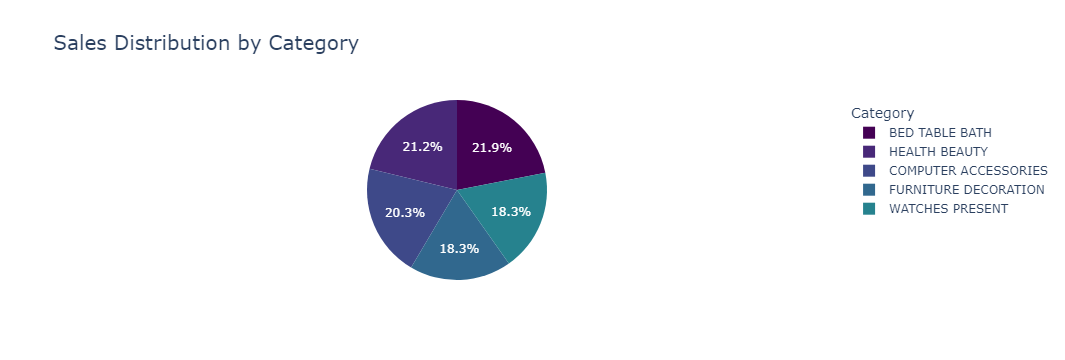

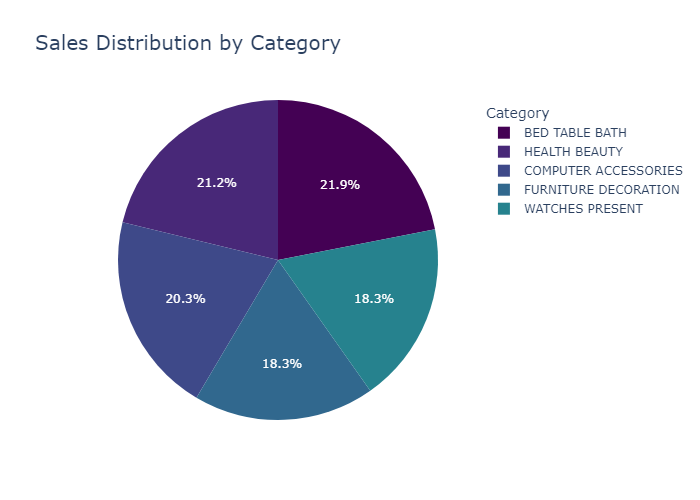

In [8]:
import plotly.express as px
px.data.tips()
fig = px.pie(Top_Sales, values=Top_Sales['Sales Percentage'], names=Top_Sales['Category'],
             title='Sales Distribution by Category',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better aesthetics
fig.update_layout(
    title_font_size=20,
    legend_title='Category',
    legend_title_font_size=14,
    template='plotly_white'  # Use a clean white template
)
fig.write_image("pie_chart.png")

fig.show()
from IPython.display import Image

# Display the saved static image
Image(filename='pie_chart.png')



### Identify the Correlation between Product price and the number of times a product has been revenue

In [152]:
query ='''select products.product_category,count(order_items.product_id) as
 No_of_products_ordered,round(avg(order_items.price),2) as Avg_Price
from  products join order_items on products.product_id = order_items.product_id
group by 1'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Times Product ordered','Avg_Price'])
df

,Category,Times Product ordered,Avg_Price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


### Calculate the Total Revenue generated by Each Seller and rank then by Revenue

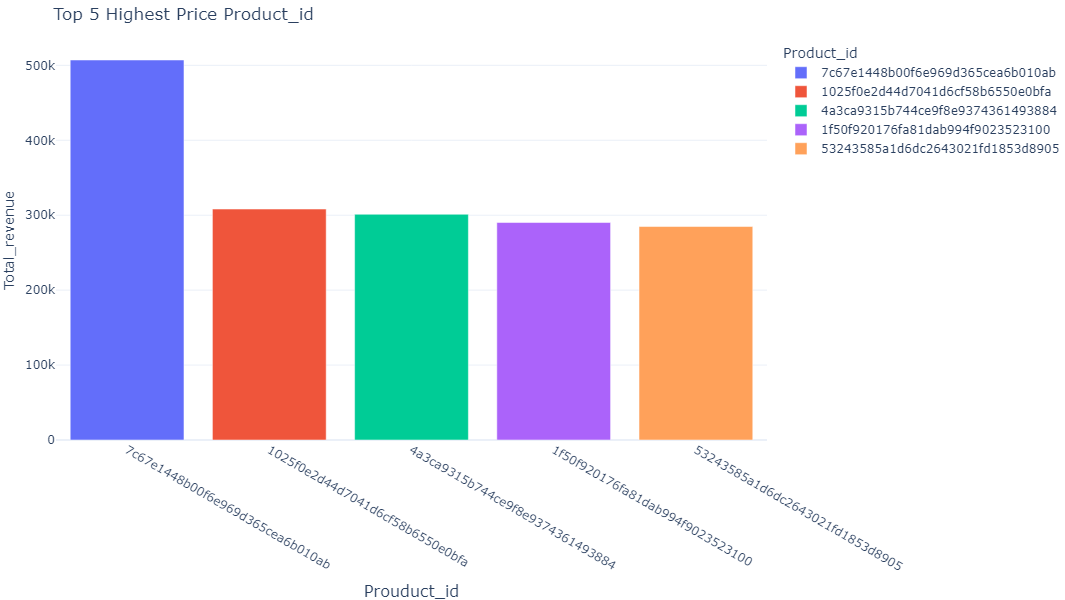

In [57]:

query='''select * , dense_rank() over (order by revenue desc) as rn from
(select sellers.seller_id,round(sum(payments.payment_value),2) as revenue from
payments join order_items on order_items.order_id=payments.order_id
join sellers on sellers.seller_id=order_items.seller_id
group by 1) as a'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Product_id','Total_revenue','Rank'])
df=df.head()
import plotly.express as px

fig = px.bar(df,x='Product_id',y='Total_revenue',color='Product_id', 
             color_continuous_scale='viridis')

fig.update_layout(
    width=800,  # Set the width in pixels
    height=600,  # Set the height in pixels
    xaxis_title='Prouduct_id',
    yaxis_title='Total_revenue',
    title_font_size=20,
    xaxis_title_font_size=16,
    title='Top 5 Highest Price Product_id',
    legend_title_font_size=14,
    template='plotly_white',  # Use a clean white template
    margin=dict(l=0, r=0, t=40, b=0)
)
    
fig.show()
# ax=sns.barplot(x=df['Product_id'],y=df['Total_revenue'],data=df,
#                palette='viridis',legend=False,
#                hue=df['Product_id'])
# ax.bar_label(ax.containers[0])

# plt.show()

### Calculate the Moving average of order value for each Customer over their Order History

In [48]:
query='''
select * ,avg(payment) over( partition by customer_id order by order_purchase_timestamp 
 rows between 2 preceding and current row) as mov_avg from
(select orders.order_id,
orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment from payments join orders on
orders.order_id=payments.order_id) as a'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['order_id','customer_id','Order_timestamp','Price','avg_order_hist'])
df


,order_id,customer_id,Order_timestamp,Price,avg_order_hist
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...,...
103881,814d6a3a7c0b32b2ad929ac6328124e9,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,8c855550908247a7eff50281b92167a8,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,83b5fc912b2862c5046555ded1483ae9,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,d0e7be325a1c986babc4e1cdb91edc03,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


###  Calculate the commulative Sales on per year, per Months

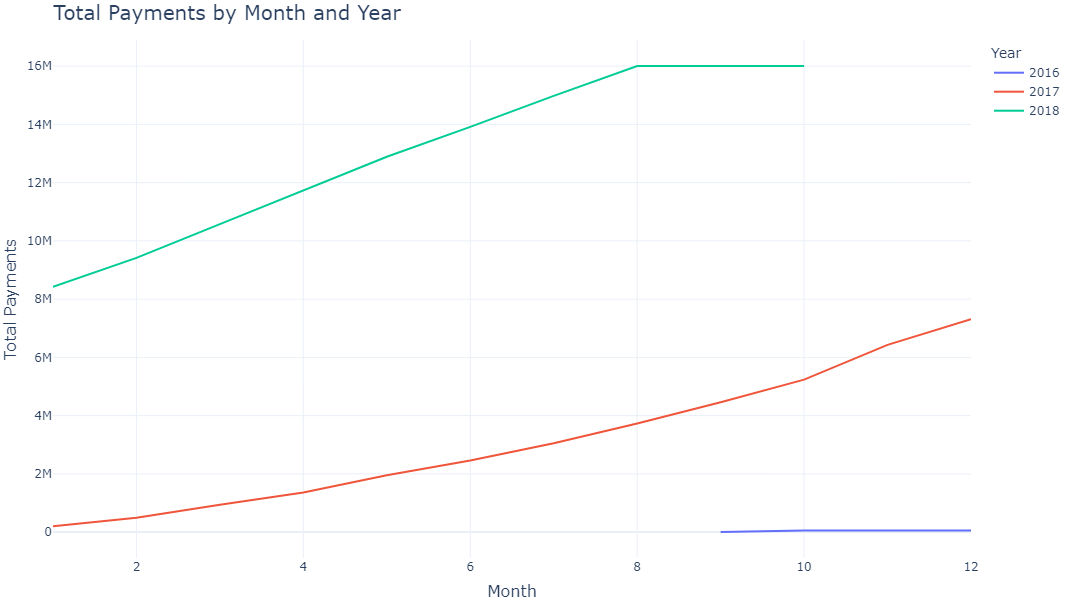

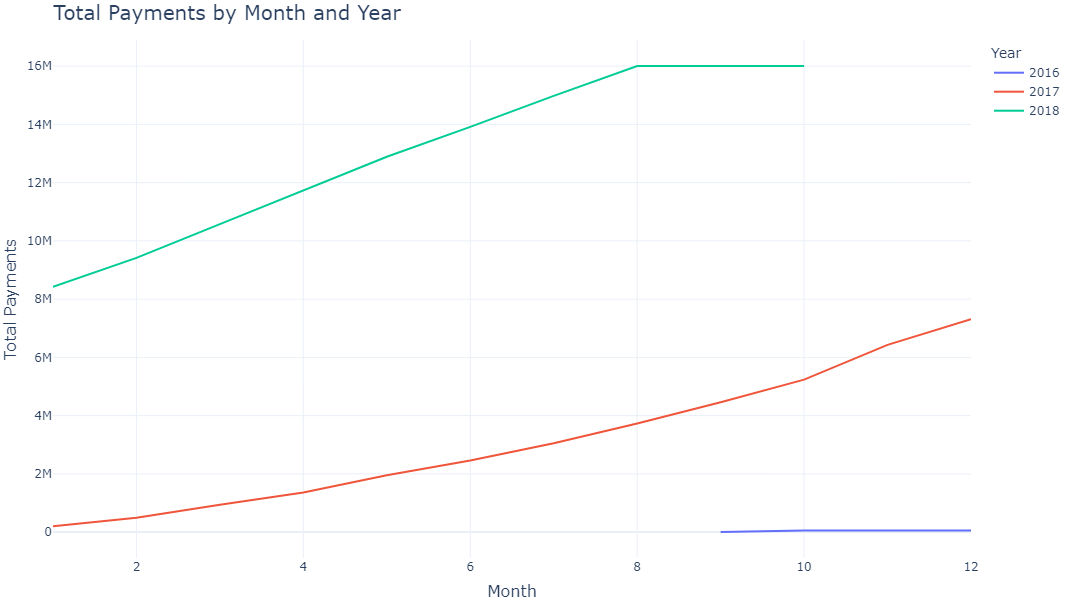

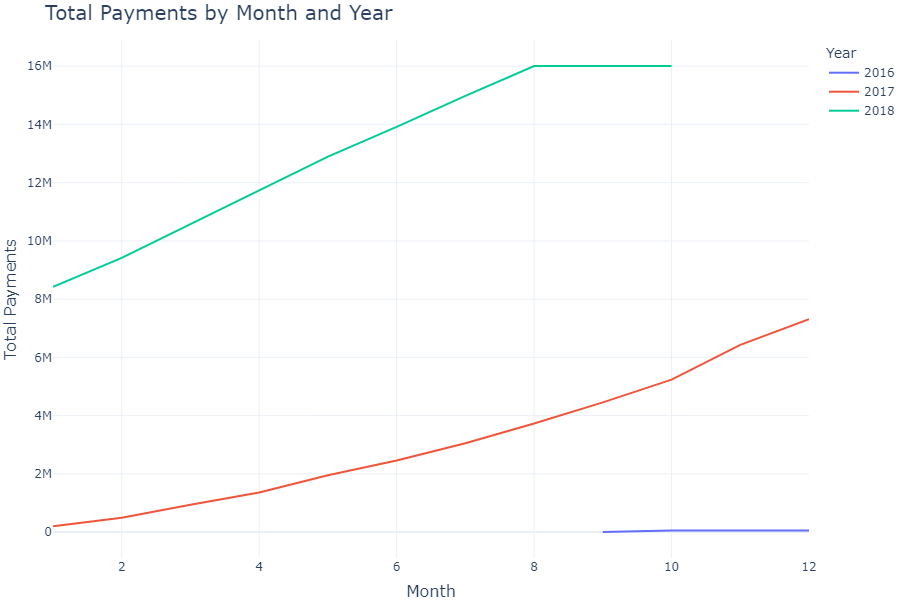

In [9]:
query ='''select * ,sum(payment) over(order by year,months) as commulative_sum from 
(select year(orders.order_purchase_timestamp) as year,
month(orders.order_purchase_timestamp) as months ,
round(sum(payments.payment_value),2) payment
from payments join orders on orders.order_id=payments.order_id
group by year,months
order by year,months) as a'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Year','Month_Name','Actual_Price','Comulative_price'])


fig = px.line(df, x='Month_Name', y='Comulative_price', color='Year',
              title='Total Payments by Month and Year',
              # labels={'Month_Name': 'Month', 'Comulative_price': 'Total Payments', 'year': 'Year'}
             )

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Payments',
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title='Year',
    legend_title_font_size=14,
    template='plotly_white',  # Use a clean white template
    margin=dict(l=0, r=0, t=40, b=0),  # Adjust margins
    width=900,  # Set the width of the graph
    height=600  # Set the height of the graph
)

# Show the plot
fig.show()

fig.write_image("line_chart.png")

fig.show()
from IPython.display import Image

# Display the saved static image
Image(filename='line_chart.png')

### Calculate the Year over Year growth Rate of total Sales

In [68]:
query ='''with a as (
select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2)  current_year_Sales
from payments join orders on orders.order_id=payments.order_id
group by years
order by years)
select years,current_year_Sales , lag(current_year_Sales,1) over(order by years) as previous_Year_Sales,
((current_year_Sales - lag(current_year_Sales,1) over(order by years))/lag(current_year_Sales,1)
over (order by years))*100
from a'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Year','Current_year_Sales','previous_year_Sales','YOY_%'])
df

,Year,Current_year_Sales,previous_year_Sales,YOY_%
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


### Calculate the Retention rate of Customers,defined as the percentage of Customers who make another purchase within 6 months of their first purchase.

In [75]:
query='''with a as 
(select customers.customer_id,min(orders.order_purchase_timestamp) as first_order
from orders join customers on customers.customer_id=orders.customer_id
group by 1) ,
b as (
select a.customer_id,count(distinct orders.order_purchase_timestamp) as next_order from a join orders
on a.customer_id=orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by 1 )
select 100* (count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id=b.customer_id
'''
cur.execute(query)
data=cur.fetchall()
data

[(None,)]

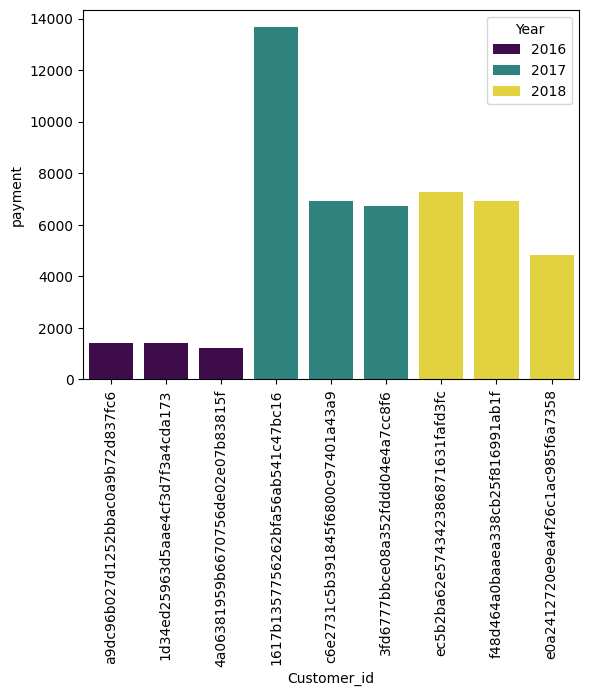

In [82]:

query='''with a as (select  year(orders.order_purchase_timestamp),orders.customer_id,sum(payments.payment_value) ,
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as rnk
from orders join payments on orders.order_id = payments.order_id
group by 1,2)
select * from a where rnk <=3
'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Year','Customer_id','payment','Rank'])
sns.barplot(data=df,x='Customer_id',y='payment',hue='Year',palette='viridis')
plt.xticks(rotation=90)
plt.show()
